In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("/content/drive/MyDrive/IoT/IoT - TF/spirotidydatafinal.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287213 entries, 0 to 2287212
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ID      int64  
 1   Visit   int64  
 2   Trial   int64  
 3   Time    float64
 4   Volume  float64
 5   Flow    float64
dtypes: float64(3), int64(3)
memory usage: 104.7 MB


Saco NaNs del archivo txt

In [17]:
df.dropna(inplace=True)

Elijo 1 paciente y 1 trial y me quedo con los valores de Flujo negativo (inspirado) que sean negativos. Los doy vuelta y recorto en el tiempo para conseguir aquellos que sean parecidos a la señal buscada

<ipython-input-18-9eade882b9dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_101_trial1_insp["Flow"]=(-1)*df_101_trial1_insp["Flow"]


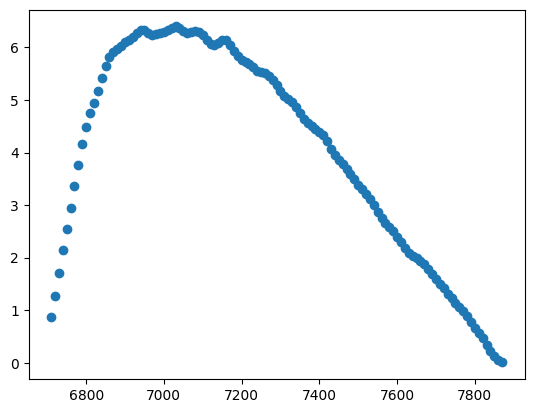

In [18]:
df_101=df[df["ID"]==104]

df_101_trial1=df_101[df_101["Trial"]==1]

df_101_trial1_insp=df_101_trial1[df_101_trial1["Flow"]<0]

df_101_trial1_insp["Flow"]=(-1)*df_101_trial1_insp["Flow"]

df_101_trial1_insp_signal=df_101_trial1_insp[df_101_trial1_insp["Time"]>6700]


plt.scatter(x=df_101_trial1_insp_signal["Time"], y=df_101_trial1_insp_signal["Flow"])
plt.show()

In [24]:
datos_flow=df_101_trial1_insp_signal["Flow"].to_list()
datos_time=df_101_trial1_insp_signal["Time"].to_list()
print(len(datos_flow))




df_101_trial1_insp_signal["Flow"].to_csv("datos_flujo.csv")

117


<ipython-input-20-cc6e5df44e0a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_101_trial1_insp["Flow"]=(-0.4)*df_101_trial1_insp["Flow"]


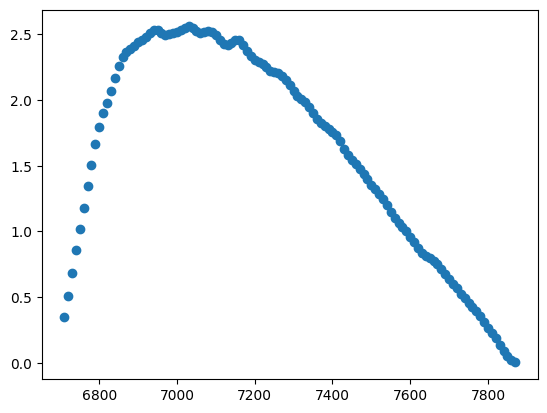

In [20]:
df_101=df[df["ID"]==104]

df_101_trial1=df_101[df_101["Trial"]==1]

df_101_trial1_insp=df_101_trial1[df_101_trial1["Flow"]<0]

df_101_trial1_insp["Flow"]=(-0.4)*df_101_trial1_insp["Flow"]

df_101_trial1_insp_signal_mala=df_101_trial1_insp[df_101_trial1_insp["Time"]>6700]


plt.scatter(x=df_101_trial1_insp_signal_mala["Time"], y=df_101_trial1_insp_signal_mala["Flow"])
plt.show()

In [21]:
df_101_trial1_insp_signal_mala["Flow"].to_csv("datos_flujo_malo.csv")